# Assignment 2 - Epipolar Geometry and 3D Reconstruction 

First name: Alice 
<br>
Last name: Fornaciari
<br>
Matriculation number: 110068805

In [1]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from data import load_homogeneous_coordinates
from utils import eight_points_algorithm, right_epipole,  plot_epipolar_line


## Part I: The Eight Point Algorithm

### Load Data

In [2]:
data_dir = './merton_college/'
img1, img2, x1, x2 = load_homogeneous_coordinates(data_dir)

### Estimate the fundamental matrix F

In [13]:
F = eight_points_algorithm(x1, x2) #x1 and x2 are the homogenwous coordinates of the projection points
assert np.linalg.matrix_rank(F) == 2
 #DISPLAY the Fundammental matrix
print('Estimated fundamental matrix F: ')
print(F)

F normalized =  [[-3.29905910e-04 -1.56522131e-02  1.12342099e-02]
 [ 4.75370627e-02  2.01376506e-03 -6.99188640e-01]
 [-3.26226921e-02  7.12345294e-01 -2.28043142e-04]]
F_n = [[-5.02241510e-05 -1.56394010e-02  1.12532638e-02]
 [ 4.75415621e-02  2.01397118e-03 -6.99188334e-01]
 [-3.26165645e-02  7.12345575e-01 -2.27625683e-04]]
Estimated fundamental matrix F: 
[[-1.02865053e-09 -3.20313590e-07  1.31896763e-04]
 [ 9.73707906e-07  4.12485323e-08 -3.65986291e-03]
 [-4.04920255e-04  3.42996433e-03  1.43956698e-01]]


### Plot epipoles and epipolar lines

In [15]:
# compute the epipole
# TODO: implement this function
e_r = right_epipole(F, type="right") #Right epipole
print ("Right epipole =", e_r)  
e_l= right_epipole(F, type="left") #Left epipole --> will use F.T
print ("Left epipole =", e_l)  

Right epipole = [3.74175199e+03 3.99757648e+02 1.00000000e+00]
Left epipole = [1.07631609e+04 4.27224410e+02 1.00000000e+00]


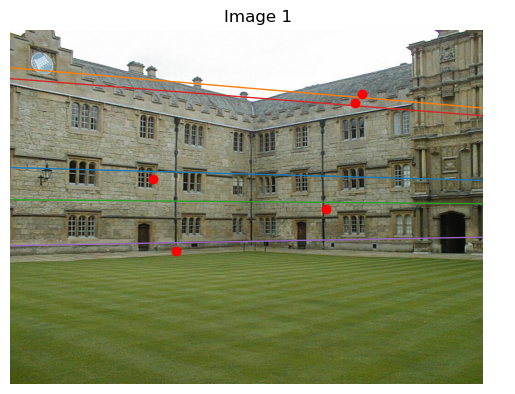

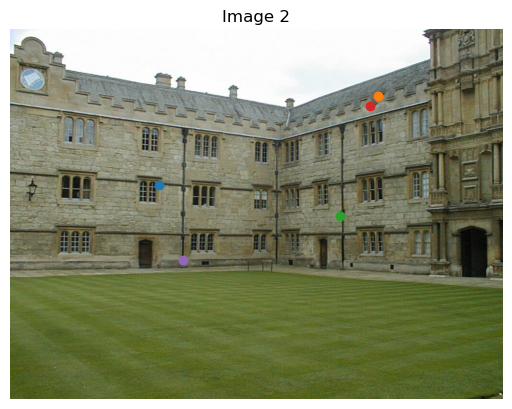

In [16]:
plt.figure()
plt.imshow(img1)
plt.title('Image 1')

# plot each line individually, this gives nice colors --> Right side
for i in range(100, 105): 
    plot_epipolar_line(img1, F.T, x2[:, i], e_r, ax=None, show_epipole=False) #it was e before

# plot each line individually --> Left side
# for i in range(100, 105): 
#     plot_epipolar_line(img2, F.T, x2[:, i], e_l, ax=None, show_epipole=False)    

plt.axis('off')
plt.figure()
plt.imshow(img2)
plt.title('Image 2')

#for i in range(100, 105): 
#    plot_epipolar_line(img2, F.T, x2[:, i], e_left, ax=None, show_epipole=True)

# plot each point individually, this gives same colors as the lines 
for i in range(100, 105):
    plt.plot(x2[0, i], x2[1, i], 'o')
    plt.axis('off')

In [26]:
# ????????? cosa devo fare???????????
#%matplotlib notebook
from ipywidgets import *

fig, ax = plt.subplots()
ax.imshow(img1)
#plt.savefig("picture1")

fig2, ax2 = plt.subplots()
ax2.imshow(img2)



def onclick(event):
    ax.plot(event.xdata, event.ydata, 'o')
    plot_epipolar_line(img2, F, np.array([event.xdata, event.ydata, 1]), e, ax2)
    ax2.imshow(img2)
    plt.savefig("picture")

cid = fig.canvas.mpl_connect('button_press_event', onclick)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>